In [1]:
import matplotlib
import matplotlib.pyplot as plt

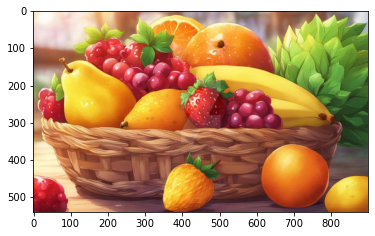

In [2]:
image = matplotlib.image.imread("fruits.jpg")
plt.imshow(image)

In [3]:
image.shape

(540, 900, 3)

In [6]:
X = image.reshape(-1,3)
X.shape

(486000, 3)

In [7]:
X

array([[251, 227, 201],
       [251, 227, 201],
       [250, 229, 202],
       ...,
       [144,  66,  18],
       [144,  66,  18],
       [145,  67,  19]], dtype=uint8)

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

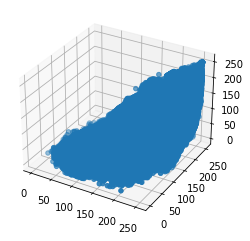

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_init=10, n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [16]:
clusters = kmeans.cluster_centers_.astype('int')
clusters

array([[234, 211, 140],
       [208, 136,  58],
       [119,  70,  49]])

In [23]:
from PIL import Image, ImageDraw
import numpy as np

def create_color_palette(dominant_colors, palette_size=(300, 50)):
    # Create an image to display the colors
    palette = Image.new("RGB", palette_size)
    draw = ImageDraw.Draw(palette)

    # Calculate the width of each color swatch
    swatch_width = palette_size[0] // len(dominant_colors)

    # Draw each color as a rectangle on the palette
    for i, color in enumerate(dominant_colors):
        draw.rectangle([i * swatch_width, 0, (i + 1) * swatch_width, palette_size[1]], fill=tuple(color))

    return palette

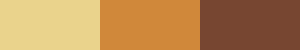

In [24]:
create_color_palette(clusters)